In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:\\Users\\LSY\\Desktop\\github\\AI-class\\Assignment\\data\\abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


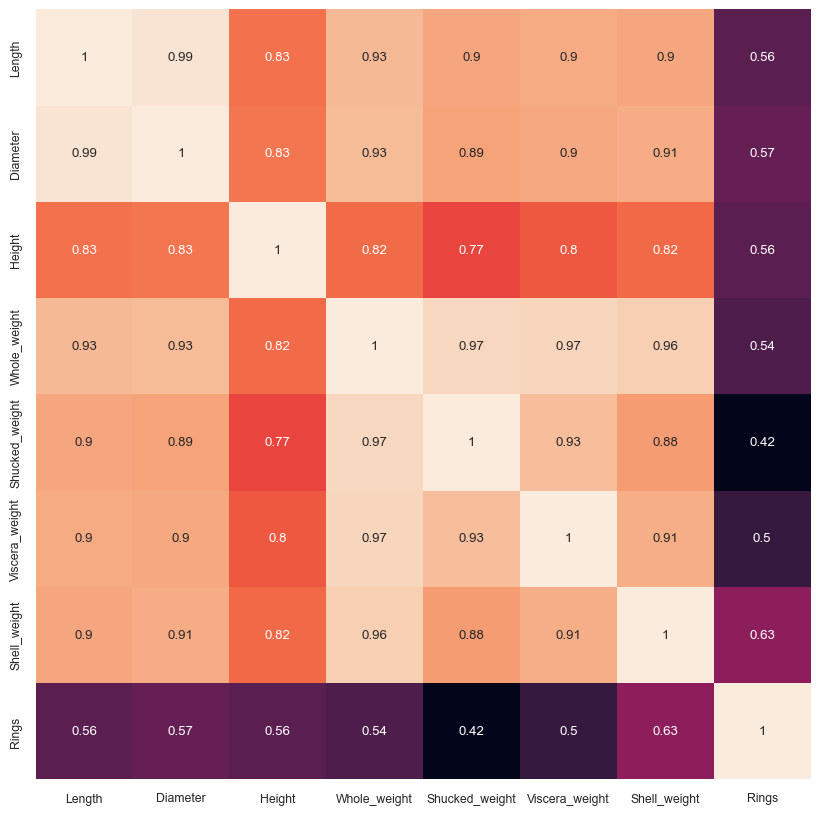

In [14]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr = df.select_dtypes(include=['number']).corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
X = df
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [20]:
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 9) (3341,)
(836, 9) (836,)


In [42]:
from sklearn.preprocessing import LabelEncoder

# X_train의 모든 object 타입 열을 Label Encoding
label_encoders = {}

for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # 테스트 데이터도 변환
    label_encoders[col] = le  # 저장해두면 나중에 해석 가능

# y_train도 변환 필요할 경우
if y_train.dtype == 'object':
    le_y = LabelEncoder()
    y_train = le_y.fit_transform(y_train)
    y_test = le_y.transform(y_test)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

# 예측 수행
y_preds = model.predict(X_test)

# 평균제곱근오차 (RMSE) 출력
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print('평균제곱근오차:', rmse)

# RMSE를 NumPy를 사용하여 계산하는 함수
def rmse_np(actual, predicted):
    return np.sqrt(np.mean((np.array(actual) - np.array(predicted)) ** 2))

print('평균제곱근오차:', rmse_np(y_test, y_preds))

# RMSE를 직접 계산하는 함수
def rmse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    root_mean_square_error = mean_square_error ** 0.5
    return root_mean_square_error

print('평균제곱근오차:', rmse(y_test, y_preds))

평균제곱근오차: 1.130646018996629e-15
평균제곱근오차: 1.130646018996629e-15
평균제곱근오차: 1.130646018996629e-15


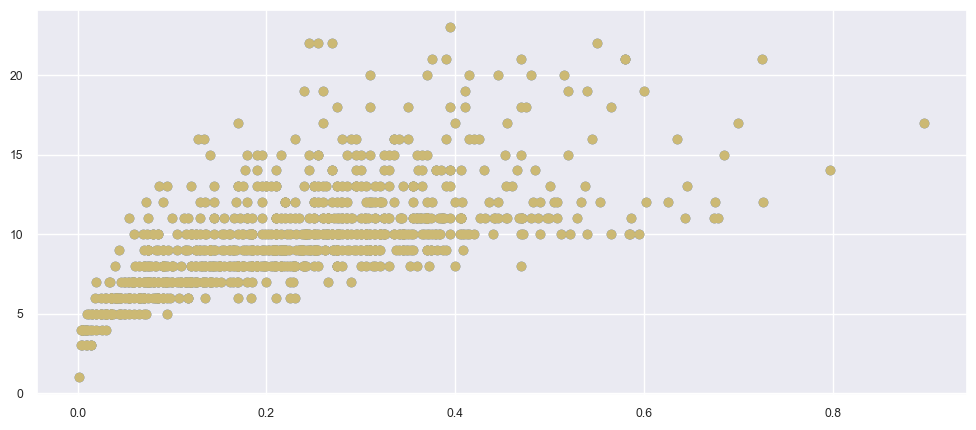

In [84]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [64]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.005980861244019139


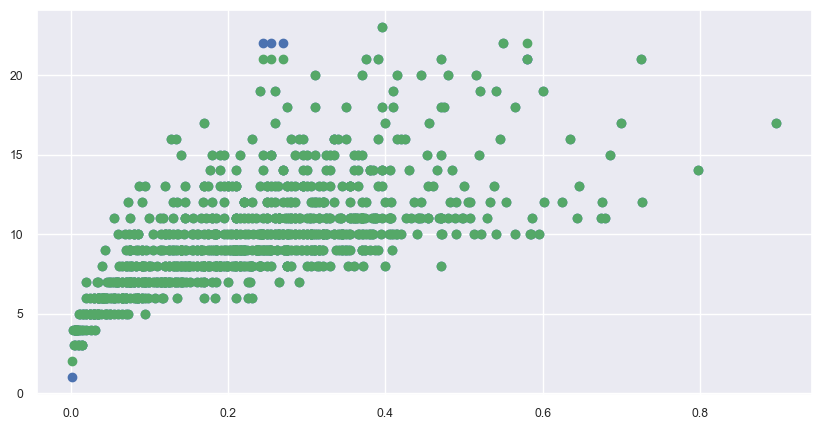

In [86]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], dy_preds, c='g', label='dy_preds')
plt.show()     

In [66]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.0028008373205741658


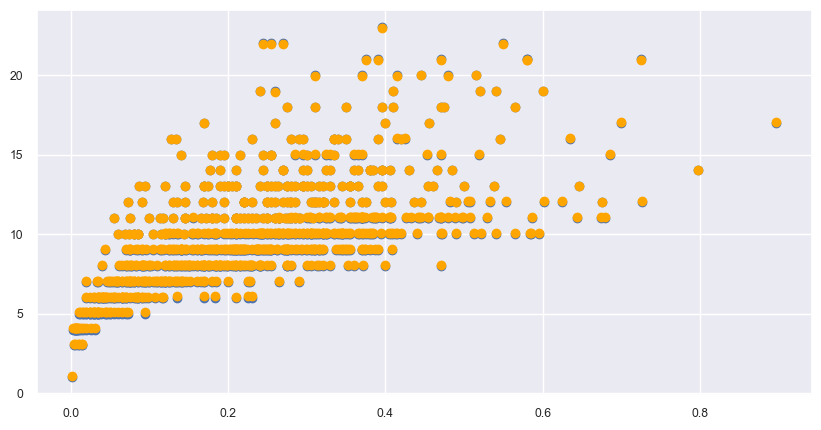

In [88]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange', label='ry_preds')

plt.show()  

In [68]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.00312912045857068


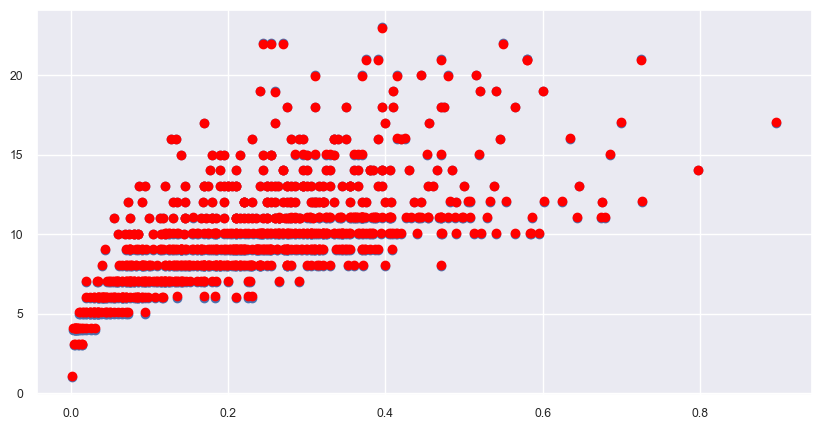

In [92]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='red', label='ry_preds')

plt.show()    